In [48]:
import networkx as nx # version 2.2
import matplotlib.pyplot as plt
import re
import cvxpy as cp
import operator #to sort elements in a list of tuples
import itertools
import math
import numpy as np
import os
import sys
import time
import random

import Init_NetRate as Init
import cvxpy as cp
import Cascade_generation_functions_NetRate as Gen
import CVX_functions as cvx

In [49]:
'''
Create the matrix Mi for the ADMM method

Each cell k,l in Mi is one if in cascade k node l infected node i, 0 otherwise

Input :
    cascade_dic : a dictionnary of all cascade (in a graph object, DAG)
    node : an int describing which node we are considering in the ADMM iteration
    number_of_nodes : number of nodes in the underlying network (we assume that rhe union of all cascades cover all the nodes)
'''
def Create_matrix_Mi_and_Ti(cascade_dic,node,number_of_nodes,window) : 
    M_i = np.zeros((len(cascade_dic),number_of_nodes))
    T_i = np.zeros((len(cascade_dic),number_of_nodes))
    for cascade in cascade_dic :
        c = cascade_dic[cascade] # graph object
        if node in c.nodes():
            t_i = c.node[node]["time"]
            parent_list = list(c.predecessors(node)) # create a list of all nodes (int) that where infected before node i in the cascade
            for parent in parent_list :
                t_parent = c.node[parent]["time"]
                M_i[cascade,parent] = 1
                T_i[cascade,parent] = (t_i-t_parent)
                if (t_i-t_parent)<=0:
                    print("Time error, the flow of time is reversed the world's end is near")
        else :
            for j in c.nodes() :
                t_j = c.node[j]["time"]
                T_i[cascade,j] = (window-t_j) # SIGNE is now correct !
                
    return M_i,T_i


    

In [100]:
for cascs in DAG_C_dic :
    c = DAG_C_dic[cascs]
    if 23 in c.nodes():
        print("yes")

In [99]:
i = 0
M_i,T_i = Create_matrix_Mi_and_Ti(DAG_C_dic,i,N,window)
grad_i = (np.sum(T_i,axis=0).T)
T_i[:,23]

array([0., 0., 0., ..., 0., 0., 0.])

In [96]:
a_k = np.ones((N,1))*alpha_init
a_k[i]=0
z = a_k.copy()
rho = np.zeros((len(DAG_C_dic),1)) 
M_i,T_i = Create_matrix_Mi_and_Ti(DAG_C_dic,i,N,window) # TO do : consider to use sparse matrix
S_i = np.matmul(M_i,z)  
grad_i = (np.sum(T_i,axis=0).T)


#Start iteration of ADMM
for k in range(0,iter_ADMM) :
    '''
    Update alpha using gradient descent
    '''
    grad = grad_i + np.matmul(rho.T,M_i)
    for j in range(0,iter_GD): 
        grad_j = grad - u*(np.matmul(M_i.T,(S_i-np.matmul(M_i,a_k))).T) # sign is correct
        a_k = a_k - gamma*grad_j.T
        a_k = np.maximum(a_k,0)
        a_k = np.minimum(a_k,alpha_max)
        print(a_k[23])

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]
[0.01]

In [50]:
def Compute_objective_value_for_one_node(alpha_mat_i,cascade_dic,window,eps,node_i) :
    obj_i = 0
    for cascs in cascade_dic :
        c = cascade_dic[cascs]
        if node_i in c.nodes():
            t_i = c.nodes[node_i]["time"]
            parents_i_list = list(c.predecessors(node_i))
            sum_tmp = 0
            for parent in parents_i_list :
                t_parent = c.nodes[parent]["time"]
                obj_i += alpha_mat_i[parent]*(t_i-t_parent)
                sum_tmp += alpha_mat_i[parent]
            if sum_tmp<=0 :
                if len(parents_i_list)>0 :
                    #print("Attention log ill defined incoming")
                    obj_i -=math.log(eps)
            else :
                obj_i -= math.log(sum_tmp)
        else :
            for j in c.nodes():
                t_j = c.nodes[j]["time"]
                obj_i += alpha_mat_i[j]*(window-t_j)
    return obj_i

def Compute_true_objective_value_per_node(G_true,cascade_dic,window,node_i):
    obj_i = 0
    for cascs in cascade_dic :
        c = cascade_dic[cascs]
        if node_i in c.nodes():
            t_i = c.nodes[node_i]["time"]
            parent_i_list = list(c.predecessors(node_i))
            sum_tmp = 0
            for parent in parent_i_list :
                if (parent,node_i) in G_true.edges():
                    t_parent = c.nodes[parent]["time"]
                    try :
                        alpha_ji = G_true.edges[(parent,node_i)]["weight"][0]
                    except TypeError :
                        alpha_ji = G_true.edges[(parent,node_i)]["weight"]
                    obj_i += alpha_ji*(t_i-t_parent)
                    sum_tmp += alpha_ji
            if sum_tmp == 0:
                if len(parent_i_list)>0 :
                    print("Oulala")
            else :
                obj_i -= math.log(sum_tmp)
        else :
            for j in c.nodes() :
                if (j,i) in G_true.edges():
                    t_j = c.nodes[j]["time"]
                    try :
                        alpha_ji = G_true.edges[(j,i)]["weight"][0]
                    except TypeError :
                        alpha_ji = G_true.edges[(j,i)]["weight"]
                    obj_i += alpha_ji*(window-t_j)
    return obj_i

In [7]:
network_file_name = "./Graph_test_SG.txt"
cascade_file_name = "./Cascade_test_SG.txt"
window = 10
model=0 # not important but needed. When constructing the underlying network specify that we use the exponential law
beta = 1 # used for the construction of the cascades, probability of the edge to transmit the infection
eps = 0.0005
alpha_max = 10 #bound alpha from above
alpha_init = 0.01 #initial value of the infectious rates
iter_ADMM = 50 #number of itteration for 1 node in the ADMM method. This is a parameter to tune
iter_GD = 1000 #number of iterations of the gradient descent
gamma = 0.000005 # Learning rate of the GD for alpha (maybe too small)
#gamma = 0.000005

In [67]:
# G_true = Init.Load_ground_truth(network_file_name)
# G_star, DAG_C_dic = Init.Init(cascade_file_name)
# N = G_true.number_of_nodes()

G_true = Gen.Generate_random_graph(30,60)
Cascades = Gen.Generate_all_cascades(G_true,-1000,window,model,beta)
Gen.Save_cascade_to_file("Cascade_test_ADMM.txt",Cascades,G_true)
Gen.Save_graph_to_file("Graph_test_ADMM.txt",G_true)
G_star,DAG_C_dic = Init.Init("Cascade_test_ADMM.txt")
N = G_true.number_of_nodes()

All nodes were read


In [68]:
A_hat = np.zeros((N,N))
u = 2 # used for the gradient descent of rho and as a penalizer and the constrain


In [93]:
t_start_global = time.time()
dic_of_obj_per_node_per_iter = {}
obj_per_node = []
for i in G_true.nodes :
    print("Node : ",i)
    t_start_node_i = time.time()
    dic_of_obj_per_node_per_iter[i] = []
    
    
    '''
    initialization
    '''
    a_k = np.ones((N,1))*alpha_init
    a_k[i]=0
    z = a_k.copy()
    rho = np.zeros((len(DAG_C_dic),1)) 
    M_i,T_i = Create_matrix_Mi_and_Ti(DAG_C_dic,i,N,window) # TO do : consider to use sparse matrix
    S_i = np.matmul(M_i,z)  
    grad_i = (np.sum(T_i,axis=0).T)

    
    #Start iteration of ADMM
    for k in range(0,iter_ADMM) :
        '''
        Update alpha using gradient descent
        '''
        grad = grad_i + np.matmul(rho.T,M_i)
        for j in range(0,iter_GD): 
            grad_j = grad - u*(np.matmul(M_i.T,(S_i-np.matmul(M_i,a_k))).T) # sign is correct
            a_k = a_k - gamma*grad_j.T
            a_k = np.maximum(a_k,0)
            a_k = np.minimum(a_k,alpha_max)
            if i ==23 :
                print(a_k[0])
            
        '''
        update S_i and rho for each cascades via the closed form formula and the gradient descent respectively
        '''
        for cascs in DAG_C_dic :
            c = DAG_C_dic[cascs]
            Malpha = np.matmul(M_i[cascs,:],a_k)
#             Malpha = 0
#             if i in c.nodes :
#                 parent_i_c = list(c.predecessors(i))
#                 for papa in parent_i_c :
#                     Malpha += a_k[papa]
#             sqrt_delta = math.sqrt((rho[cascs]+Malpha)**2 + 4*u)
#             S_i[cascs] = ((rho[cascs]+Malpha)+sqrt_delta)/(2*u)
            if i in c.nodes() and len(list(c.predecessors(i)))>0 :
                sqrt_delta = math.sqrt((rho[cascs]+u*Malpha)**2+4*u)
                S_i[cascs] = (rho[cascs]+u*Malpha + sqrt_delta)/(2*u)
                if S_i[cascs]<0 :
                    print("Huston Huston we have a probleme")
                if S_i[cascs] ==0 :
                    print("one component of S_i is zero")
#                 rho[cascs] = rho[cascs]-u*(S_i[cascs]-Malpha)
#             else :
#                 S_i[cascs] = (rho[cascs]+u*Malpha)/u

            rho[cascs] = rho[cascs]-u*(S_i[cascs]-Malpha)
            
        '''compute the objective function for node i in iteration k'''
        if k%5 ==0 :
            print(k)
            obj_i_k = Compute_objective_value_for_one_node(a_k,DAG_C_dic,window,eps,i)
            dic_of_obj_per_node_per_iter[i].append(obj_i_k)
    A_hat[:,i] = a_k.flatten()
    t_end_node_i = time.time()
    print("computation time for node i : ", t_end_node_i-t_start_node_i)
t_end_global = time.time()
print("total computation time : ",t_end_global-t_start_global) 

Node :  0
0
5
10
15
20
25
30
35
40
45
computation time for node i :  2.4383058547973633
Node :  1
0
5
10
15
20
25
30
35
40
45
computation time for node i :  2.1084954738616943
Node :  2
0
5
10
15
20
25
30
35
40
45
computation time for node i :  2.199261426925659
Node :  3
0
5
10
15
20
25
30
35
40
45
computation time for node i :  2.1402385234832764
Node :  4
0
5
10
15
20
25
30
35
40
45
computation time for node i :  2.4115495681762695
Node :  5
0
5
10
15
20
25
30
35
40
45
computation time for node i :  2.2543187141418457
Node :  6
0
5
10
15
20
25
30
35
40
45
computation time for node i :  2.719097852706909
Node :  7
0
5
10
15
20
25
30
35
40
45
computation time for node i :  2.7314698696136475
Node :  8
0
5
10
15
20
25
30
35
40
45
computation time for node i :  2.9551374912261963
Node :  9
0
5
10
15
20
25
30
35
40
45
computation time for node i :  3.226011037826538
Node :  10
0
5
10
15
20
25
30
35
40
45
computation time for node i :  2.9992828369140625
Node :  11
0
5
10
15
20
25
30
35
4

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
5
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
40
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


In [101]:
'''
Precision and recall computation
'''
correct = 0
edge_G_star = list(G_star.edges())
G_star.remove_edges_from(edge_G_star)
for i in range(0,G_true.number_of_nodes()):
    for j in range(0,G_true.number_of_nodes()):
        if A_hat[i,j] >1e-2:
            G_star.add_edge(i,j)
            if (i,j) in G_true.edges():
                correct +=1
#                 print("edge ",(i,j))
#                 print("alpha is ",A_hat[i,j])
print("Precision :",correct/G_star.number_of_edges())
print("Recall :",correct/G_true.number_of_edges())
print("Number of correct infered edges : ",correct)
print("Number of edges in G_hat :",G_star.number_of_edges())
print("Number of edges in the true network ",G_true.number_of_edges())
        

Precision : 0.9814814814814815
Recall : 0.8833333333333333
Number of correct infered edges :  53
Number of edges in G_hat : 54
Number of edges in the true network  60


In [102]:
'''
mean square error
'''
mse = 0
nb_correcte_edges=0
for edge in G_true.edges():
    if edge in G_star.edges():
        nb_correcte_edges +=1
        try:
            true_alpha = G_true.edges[edge]["weight"][0]
        except TypeError:
            true_alpha = G_true.edges[edge]["weight"]
        approx_alpha = A_hat[edge[0],edge[1]]
        mse += pow((true_alpha-approx_alpha),2) # mean square error
#         print("For edge " + str(edge)+ " the true weight is : " + str(true_alpha))
#         print("For edge " + str(edge)+ " the approx weight is : " + str(approx_alpha))
try :
    mse = mse/nb_correcte_edges
except ZeroDivisionError:
    print ("There is no correct edge")
print(" Mean square error is : ",mse)

 Mean square error is :  0.005313561723385337


In [75]:
true_total_obj = 0
true_obj_per_node = []
for i in G_true.nodes():
    obj_i = Compute_true_objective_value_per_node(G_true,DAG_C_dic,window,i)
    print("Node %i has objective value %f" %(i,obj_i))
    true_obj_per_node.append(obj_i)
    true_total_obj += obj_i
print("true objective value : ",true_total_obj)


total_obj = 0
obj_per_node = []
for i in G_true.nodes():
    alpha_mat_i = A_hat[:,i]
    obj_i = Compute_objective_value_for_one_node(alpha_mat_i,DAG_C_dic,window,eps,i)
    print("Node %i has objective value %f" %(i,obj_i))
    obj_per_node.append(obj_i)
    total_obj += obj_i
print("Infered objective value : ", total_obj)

Node 0 has objective value 259.233312
Node 1 has objective value 0.000000
Node 2 has objective value 0.000000
Node 3 has objective value 576.310799
Node 4 has objective value 948.777003
Node 5 has objective value 0.000000
Node 6 has objective value 1127.068199
Node 7 has objective value 1183.703180
Node 8 has objective value 821.098898
Node 9 has objective value 1285.872964
Node 10 has objective value 1039.555654
Node 11 has objective value 945.362614
Node 12 has objective value 0.000000
Node 13 has objective value 758.395628
Node 14 has objective value 670.813423
Node 15 has objective value 1299.414959
Node 16 has objective value 880.365989
Node 17 has objective value 880.329904
Node 18 has objective value 907.818343
Node 19 has objective value 841.665663
Node 20 has objective value 980.900633
Node 21 has objective value 1130.110819
Node 22 has objective value 664.142570
Node 23 has objective value 0.000000
Node 24 has objective value 365.752136
Node 25 has objective value 925.165521


In [76]:
(total_obj-true_total_obj)/true_total_obj

0.07986760912283875

In [94]:
for i in range(0,A_hat.shape[0]):
    for j in range(0,A_hat.shape[1]) :
        if A_hat[i,j]==alpha_init:
            print(i,j)

23 0
23 1
23 2
23 3
23 4
23 5
23 6
23 7
23 8
23 9
23 10
23 11
23 12
23 13
23 14
23 15
23 16
23 17
23 18
23 19
23 20
23 21
23 22
23 24
23 25
23 26
23 27
23 28
23 29
26 0


Node :  143


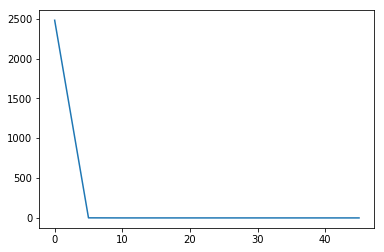

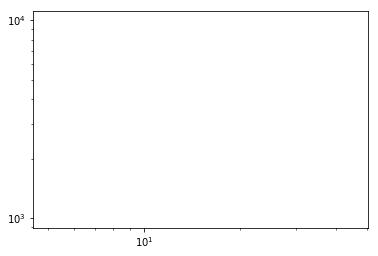

In [65]:
node_rand = random.choice(list(G_true.nodes()))
print("Node : ",node_rand)
x_axis = [x*5 for x in list(range(0,10))]
true_obj_value_node = true_obj_per_node[node_rand]
bla = [x-true_obj_value_node for x in dic_of_obj_per_node_per_iter[node_rand]]
plt.plot(x_axis,bla)
plt.show()
plt.loglog(x_axis,bla)
plt.show()

In [16]:
bla

[array([2995.92630457]),
 array([-2.09270265]),
 array([-2.86814486]),
 array([-3.00676009]),
 array([-3.02786833]),
 array([-3.03141675]),
 array([-3.03207314]),
 array([-3.03219703]),
 array([-3.03222052]),
 array([-3.03222498])]